# 特征脸

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people()

In [9]:
lfw_people.target.shape

(13233,)

In [10]:
list(lfw_people.target_names)

['AJ Cook',
 'AJ Lamas',
 'Aaron Eckhart',
 'Aaron Guiel',
 'Aaron Patterson',
 'Aaron Peirsol',
 'Aaron Pena',
 'Aaron Sorkin',
 'Aaron Tippin',
 'Abba Eban',
 'Abbas Kiarostami',
 'Abdel Aziz Al-Hakim',
 'Abdel Madi Shabneh',
 'Abdel Nasser Assidi',
 'Abdoulaye Wade',
 'Abdul Majeed Shobokshi',
 'Abdul Rahman',
 'Abdulaziz Kamilov',
 'Abdullah',
 'Abdullah Ahmad Badawi',
 'Abdullah Gul',
 'Abdullah Nasseef',
 'Abdullah al-Attiyah',
 'Abdullatif Sener',
 'Abel Aguilar',
 'Abel Pacheco',
 'Abid Hamid Mahmud Al-Tikriti',
 'Abner Martinez',
 'Abraham Foxman',
 'Aby Har-Even',
 'Adam Ant',
 'Adam Freier',
 'Adam Herbert',
 'Adam Kennedy',
 'Adam Mair',
 'Adam Rich',
 'Adam Sandler',
 'Adam Scott',
 'Adel Al-Jubeir',
 'Adelina Avila',
 'Adisai Bodharamik',
 'Adolfo Aguilar Zinser',
 'Adolfo Rodriguez Saa',
 'Adoor Gopalakarishnan',
 'Adrian Annus',
 'Adrian Fernandez',
 'Adrian McPherson',
 'Adrian Murrell',
 'Adrian Nastase',
 'Adriana Lima',
 'Adriana Perez Navarro',
 'Adrianna Zuzic',
 

In [5]:
list(lfw_people.target[:10])

[5360, 3434, 3807, 26, 3957, 439, 2683, 3734, 5465, 3445]

In [6]:
lfw_people.images.shape

(13233, 62, 47)

In [7]:
lfw_people.data.shape

(13233, 2914)

In [11]:
random_indexes = np.random.permutation(len(lfw_people.data))
X = lfw_people.data[random_indexes]

In [12]:
example_faces = X[:36, :]
example_faces.shape

(36, 2914)

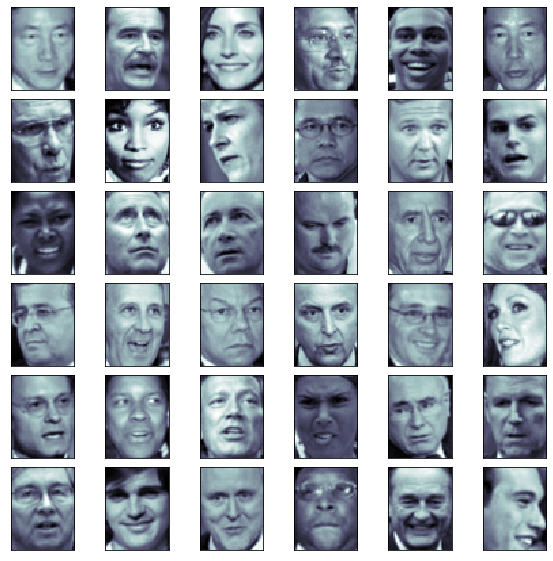

In [13]:
def plot_faces(data):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62, 47), cmap='bone')

    plt.show()

plot_faces(example_faces)

## 特征脸

In [14]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 27.9 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

In [17]:
pca.components_.shape

(2914, 2914)

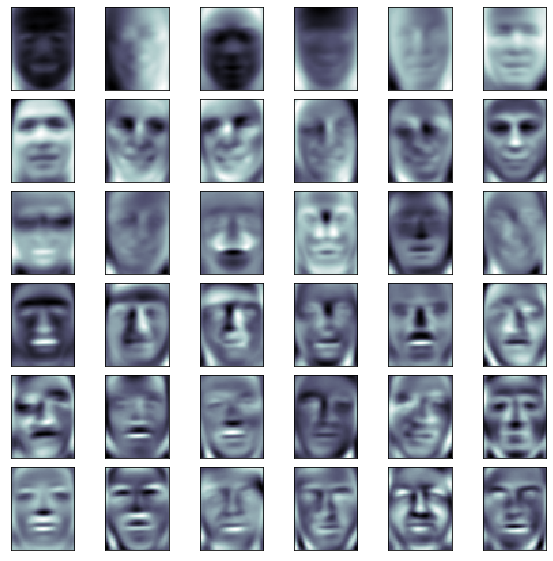

In [18]:
plot_faces(pca.components_[:36])

In [19]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces.data.shape

(1348, 2914)

In [20]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

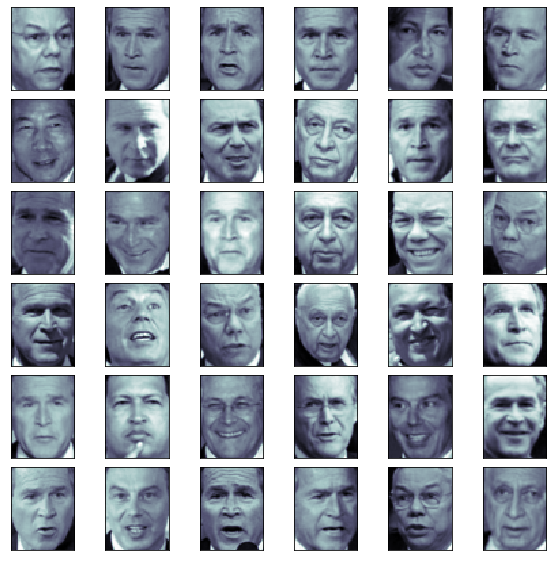

In [22]:
plot_faces(faces.data)